# EDA-Project 2

This is your second project from the second block of the Data Science course.
You are provided with the following file: ```"houses_to_rent.csv"```.

Make an EDA according to the data.
List the questions you think are important. Then try to answer each question with a visualization. Please make your code clean and your arguments understandable.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!matplotlib inline
import seaborn as sns

'matplotlib' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
file_csv = [f for f in os.listdir()]
file_csv

['.ipynb_checkpoints',
 'eda-project-1.ipynb',
 'eda-project-2.ipynb',
 'foreign_exchange_rates.csv',
 'houses_to_rent.csv',
 'project1.zip',
 'project2.zip']

In [3]:
h2r = pd.read_csv('houses_to_rent.csv')

In [4]:
h2r.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


# Basic Description and Handling of Missing Values

In [6]:
h2r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [10]:
h2r['animal'].value_counts()

acept        4666
not acept    1414
Name: animal, dtype: int64

In [11]:
def convert_to_numeric(df, col_name):
    df[col_name] = df[col_name].str.replace("[^0-9]", "")
    df[col_name] = pd.to_numeric(df[col_name], errors="coerce").astype("Int64")
    return df

In [12]:
convert_to_numeric(h2r,'hoa')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,4172,"R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,0,"R$1,200",R$41,R$16,"R$1,257"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,"R$1,150",R$0,R$15,"R$1,585"
6076,6076,1,84,2,2,1,16,not acept,furnished,768,"R$2,900",R$63,R$37,"R$3,768"
6077,6077,0,48,1,1,0,13,acept,not furnished,250,R$950,R$42,R$13,"R$1,255"
6078,6078,1,160,3,2,2,-,not acept,not furnished,0,"R$3,500",R$250,R$53,"R$3,803"


In [13]:
convert_to_numeric(h2r,'total')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,"R$8,000","R$1,000",R$121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,R$820,R$122,R$11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,"R$7,000","R$1,417",R$89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,"R$1,250",R$150,R$16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,"R$1,200",R$41,R$16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,"R$1,150",R$0,R$15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,"R$2,900",R$63,R$37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,R$950,R$42,R$13,1255
6078,6078,1,160,3,2,2,-,not acept,not furnished,0,"R$3,500",R$250,R$53,3803


In [14]:
convert_to_numeric(h2r,'rent amount')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,8000,"R$1,000",R$121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,R$122,R$11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,"R$1,417",R$89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,R$150,R$16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,1200,R$41,R$16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,1150,R$0,R$15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,2900,R$63,R$37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,950,R$42,R$13,1255
6078,6078,1,160,3,2,2,-,not acept,not furnished,0,3500,R$250,R$53,3803


In [15]:
convert_to_numeric(h2r,'property tax')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,8000,1000,R$121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,R$11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,R$89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,R$16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,R$16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,R$15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,R$37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,950,42,R$13,1255
6078,6078,1,160,3,2,2,-,not acept,not furnished,0,3500,250,R$53,3803


In [16]:
convert_to_numeric(h2r,'fire insurance')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,-,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,950,42,13,1255
6078,6078,1,160,3,2,2,-,not acept,not furnished,0,3500,250,53,3803


In [17]:
convert_to_numeric(h2r,'floor')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,<NA>,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,<NA>,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,6075,1,50,2,1,1,2,acept,not furnished,420,1150,0,15,1585
6076,6076,1,84,2,2,1,16,not acept,furnished,768,2900,63,37,3768
6077,6077,0,48,1,1,0,13,acept,not furnished,250,950,42,13,1255
6078,6078,1,160,3,2,2,<NA>,not acept,not furnished,0,3500,250,53,3803


In [19]:
h2r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           4525 non-null   Int64 
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             5878 non-null   Int64 
 10  rent amount     6080 non-null   Int64 
 11  property tax    6053 non-null   Int64 
 12  fire insurance  6080 non-null   Int64 
 13  total           6080 non-null   Int64 
dtypes: Int64(6), int64(6), object(2)
memory usage: 700.8+ KB


In [20]:
h2r['hoa'].value_counts().get(0, 0)

1291

In [21]:
h2r['hoa'].isna().sum()

202

In [22]:
h2r['floor'].isna().sum()

1555

In [23]:
h2r['floor'].value_counts().get(0, 0)

0

In [24]:
h2r['property tax'].isna().sum()

27

In [36]:
h2r['floor'].value_counts()

0     1555
1      573
3      401
2      379
4      319
5      314
6      306
8      291
7      287
9      224
10     213
11     193
12     179
13     143
14     141
15     107
16      89
17      73
18      69
19      47
20      36
21      30
23      26
25      23
22      21
24      11
27       7
26       6
28       6
29       4
68       1
31       1
51       1
35       1
32       1
99       1
85       1
Name: floor, dtype: Int64

- We can't remove all NA values since there are 1555 out of 6080, and this severely skews our data
- Let's change all NA values to 0, because we note that there is no value_counts in exactly
- 0 and usually in many countries the ground floor is indicated as the initial floor

In [28]:
h2r['floor'].fillna(0, inplace=True)

In [29]:
h2r.isna().sum()

Unnamed: 0          0
city                0
area                0
rooms               0
bathroom            0
parking spaces      0
floor               0
animal              0
furniture           0
hoa               202
rent amount         0
property tax       27
fire insurance      0
total               0
dtype: int64

In [40]:
h2r['hoa'].describe()

count      5878.000000
mean       1125.830725
std        4043.997630
min           0.000000
25%         248.500000
50%         683.500000
75%        1500.000000
max      220000.000000
Name: hoa, dtype: float64

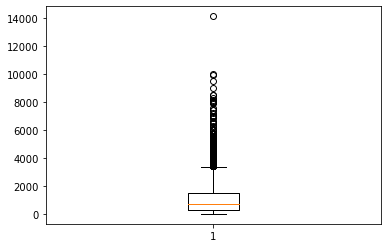

In [60]:
filtered_data = h2r['hoa'][~np.isnan(h2r['hoa'])]
filtered_data = filtered_data[filtered_data < 15000]
plt.boxplot(filtered_data);

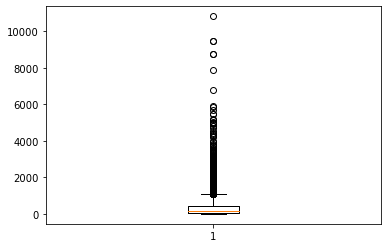

In [62]:
filtered_data = h2r['property tax'][~np.isnan(h2r['property tax'])]
filtered_data = filtered_data[filtered_data < 25000]
plt.boxplot(filtered_data);

- hoa - Homeowners associations - instead of NA, put an empty value, as in hoa
- 202 NA value and it is difficult to replace them with a lot of outliers even for a value less than 15000
- property tax - also only 27 NA value and a lot of outliers

In [86]:
df = h2r.replace(np.nan, '', regex=True)

In [87]:
df.isna().sum()

Unnamed: 0        0
city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [88]:
df['hoa'].value_counts()

0       1291
         202
1000      82
1200      71
1100      70
        ... 
1899       1
846        1
845        1
841        1
2047       1
Name: hoa, Length: 1291, dtype: int64

In [89]:
df['property tax'].value_counts().get('', 0)

27

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   int64 
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   int64 
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   int64 
 13  total           6080 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 665.1+ KB


In [91]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121,9121
1,1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16,1257


In [92]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [93]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16,1257


In [95]:
df['hoa'] = pd.to_numeric(df['hoa'], errors="coerce").astype("Int64")

In [96]:
df['property tax'] = pd.to_numeric(df['property tax'], errors="coerce").astype("Int64")

In [98]:
df['animal'].unique()

array(['acept', 'not acept'], dtype=object)

In [99]:
df['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

In [100]:
df['animal'] = df['animal'].apply(lambda x: 0 if x=='not acept' else 1)

In [101]:
df['furniture'] = df['furniture'].apply(lambda x: 0 if x=='not furnished' else 1)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            6080 non-null   int64
 1   area            6080 non-null   int64
 2   rooms           6080 non-null   int64
 3   bathroom        6080 non-null   int64
 4   parking spaces  6080 non-null   int64
 5   floor           6080 non-null   int64
 6   animal          6080 non-null   int64
 7   furniture       6080 non-null   int64
 8   hoa             5878 non-null   Int64
 9   rent amount     6080 non-null   int64
 10  property tax    6053 non-null   Int64
 11  fire insurance  6080 non-null   int64
 12  total           6080 non-null   int64
dtypes: Int64(2), int64(11)
memory usage: 629.5 KB


# Basic descriptions

C:\Users\HUAWEI\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\HUAWEI\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\HUAWEI\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


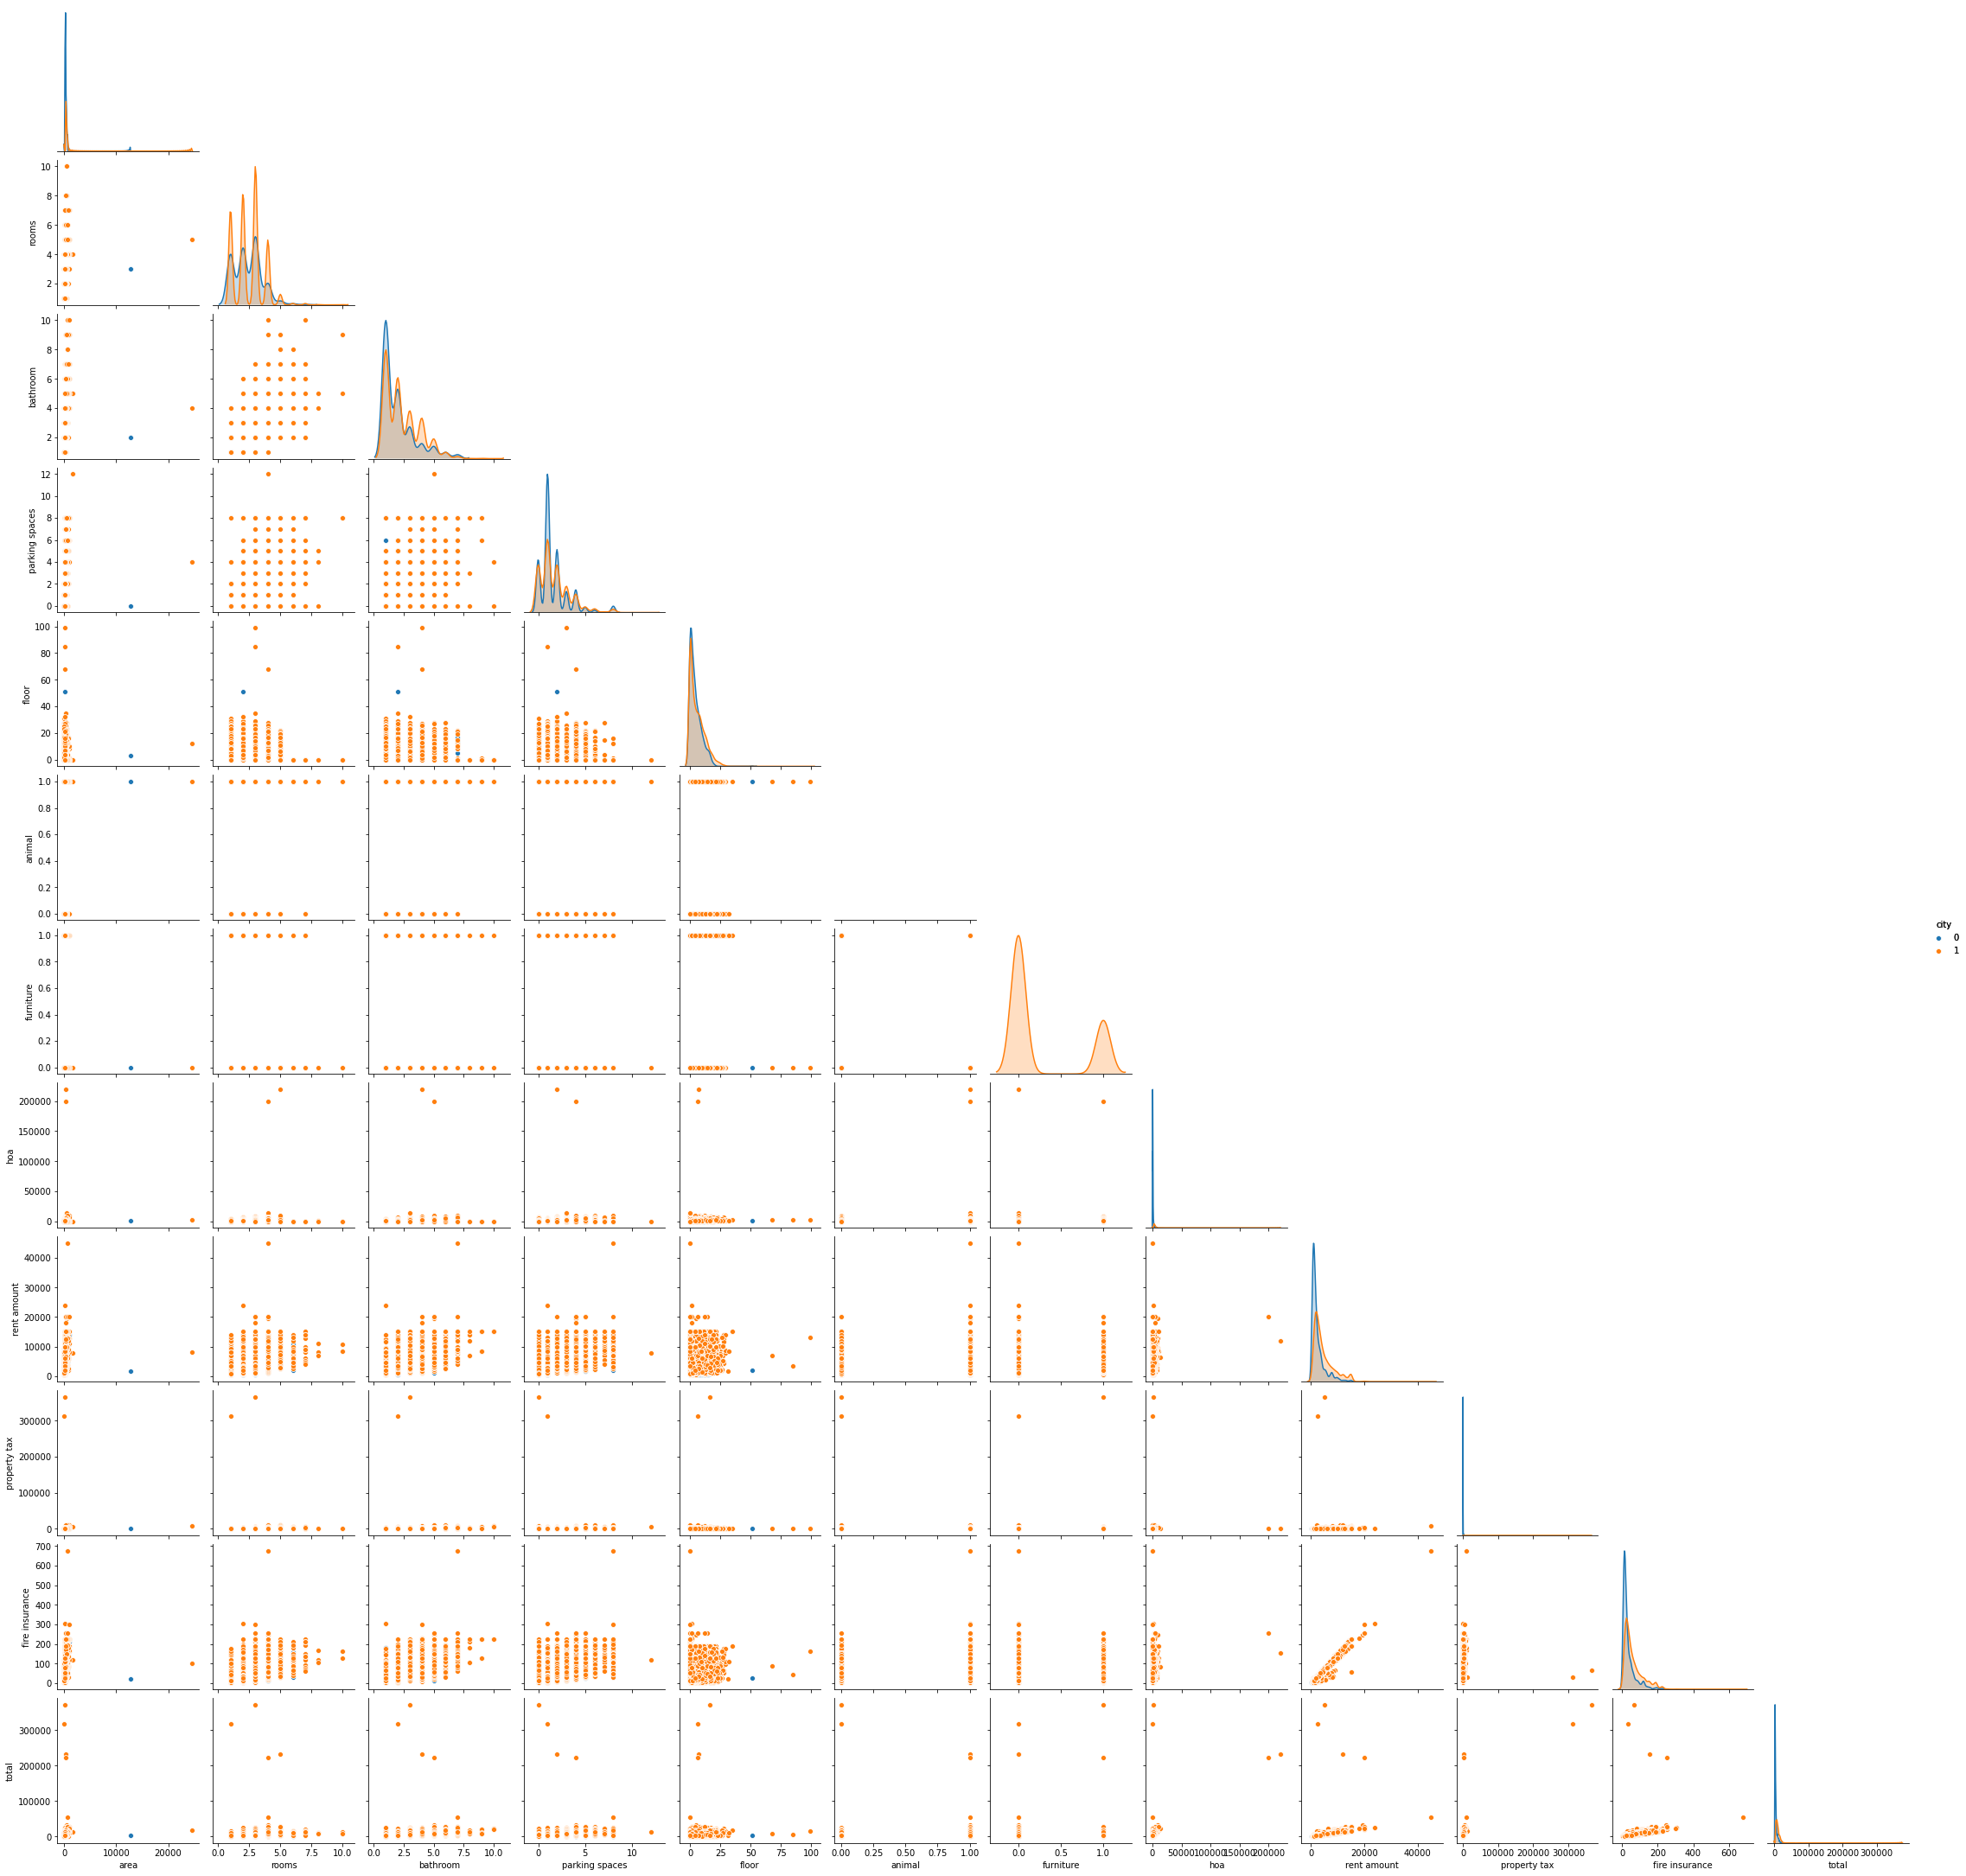

In [105]:
sns.pairplot(data=df,diag_kind='kde',kind='scatter',corner=True,hue='city').add_legend()

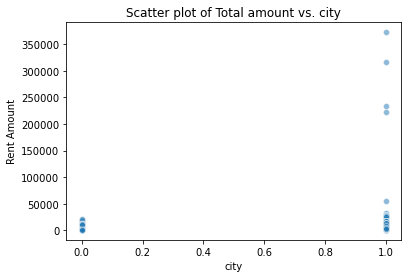

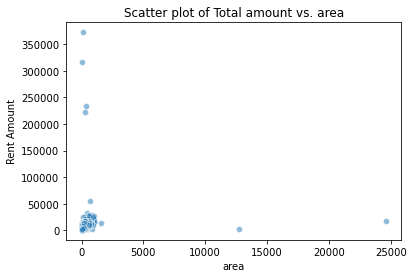

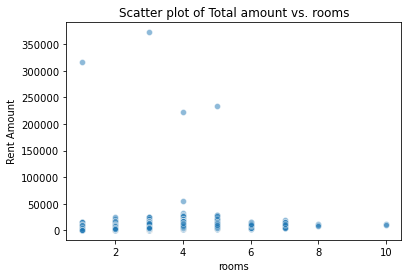

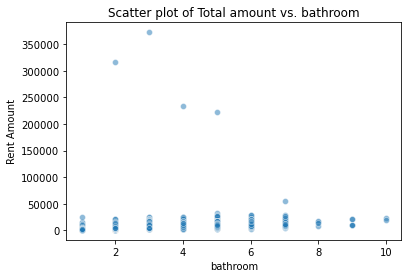

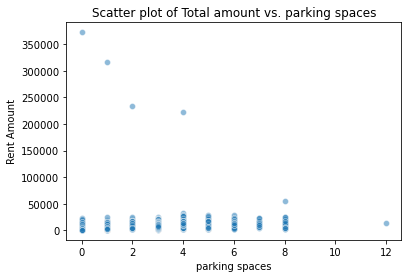

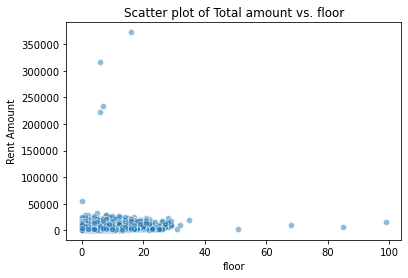

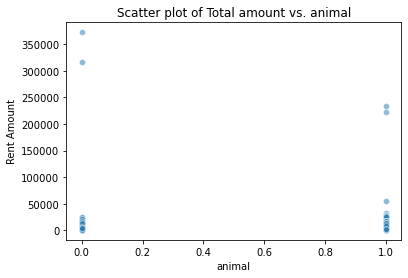

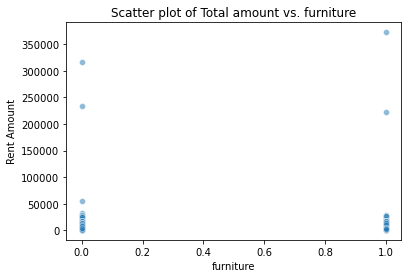

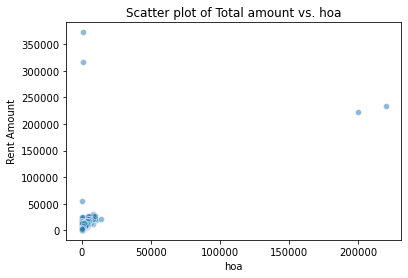

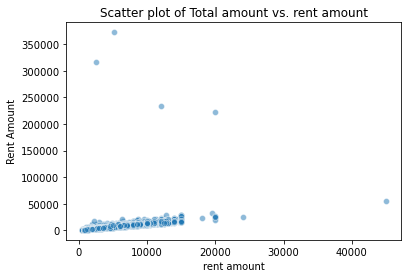

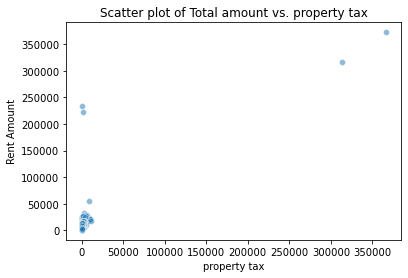

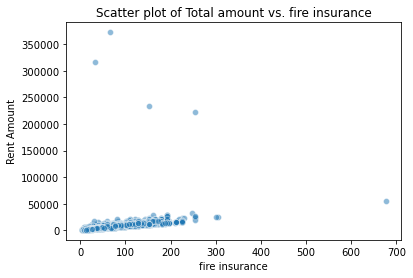

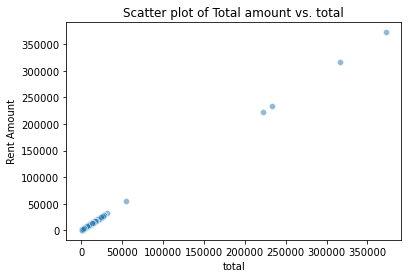

In [133]:
columns = df.columns.tolist()
for col in columns:
    sns.scatterplot(df[col], df['total'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Rent Amount')
    plt.title('Scatter plot of Total amount vs. {}'.format(col))
    plt.show()

# Key note:
- Outliers greatly distort the scatter plot, which will need to be studied in the future
- Even with them, you can see that area is significantly correlated with rent amount c total, fire insurance, property tax, hoa, which is not surprising
since they directly depend on the rent amount
- rooms and bathroom have a significant correlation
- and finally, for all parameters, outliers affect the distribution,
which means in the future should consider them without emissions

In [106]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257


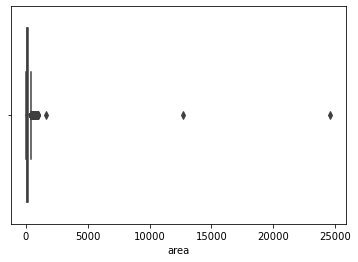

In [108]:
sns.boxplot(df['area']);

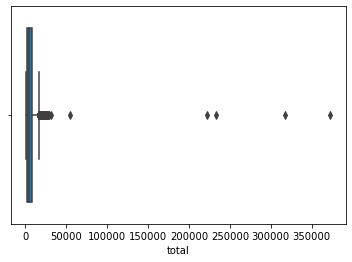

In [109]:
sns.boxplot(df['total']);

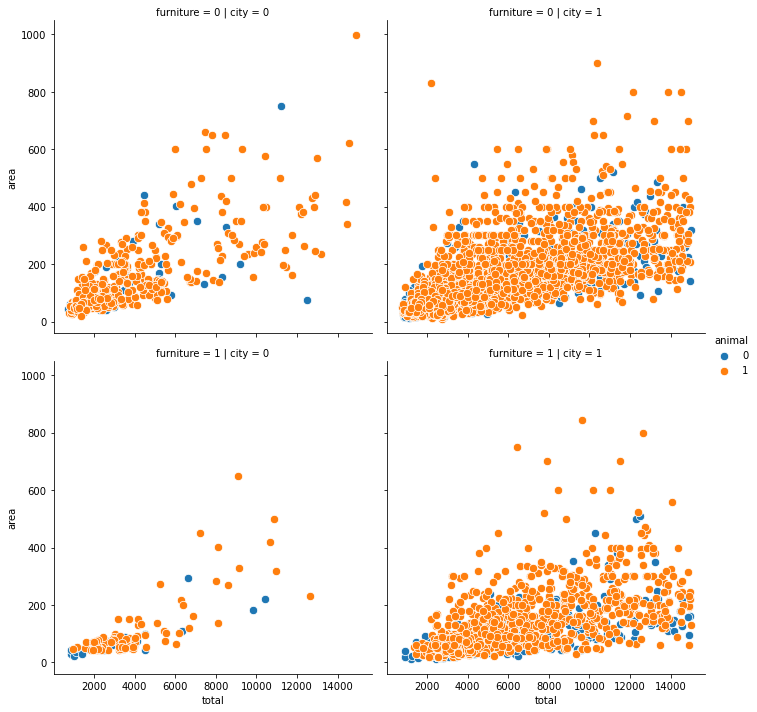

In [107]:
g =sns.FacetGrid(data=df[(df['total'] < 15000) & (df['area'] < 1500)],col='city',row='furniture',hue='animal',height=5)
g.map_dataframe(sns.scatterplot,"total","area",s=70).add_legend();

- as mentioned earlier without outliers area and total have a correlation
- we added more categorical data like furniture, city, animal (1:Yes,0:No)
- those who have animals, furniture, and live in the city live in big houses
- a lot of data for those who live in the city

In [110]:
df['city'].value_counts()

1    5249
0     831
Name: city, dtype: int64

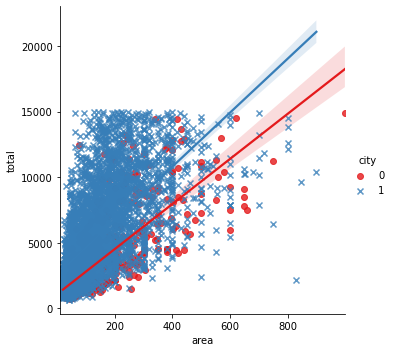

In [79]:
sns.lmplot(x='area',y='total',data=df[(df['total'] < 15000) & (df['area'] < 1500)],hue='city',markers=["o", "x"], palette="Set1");

- scatter plot for area and total and linear regression (lmplot) for those who live and do not live in the city
- those who live in the city pay more than those who do not live
- although we cannot fully say so because city=0 is only 831 values

# Outliers and correlation

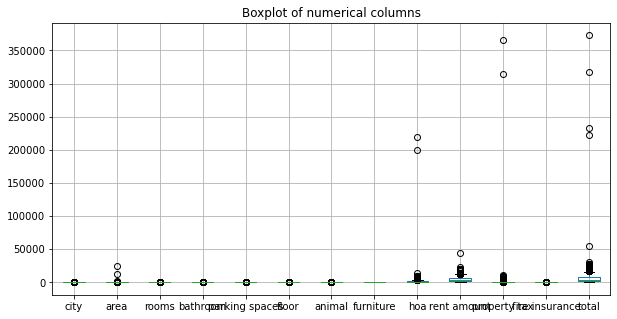

In [112]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 5))
num_cols.boxplot()
plt.title("Boxplot of numerical columns")
plt.show()

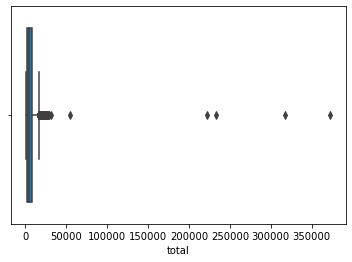

In [113]:
sns.boxplot(df['total']);

- now consider outliers for total (because the value of total directly depends on property tax, fire insurance, rent amount), we will study with what parameters it correlates

In [119]:
df[df['total'] > 20000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
13,1,375,4,5,5,1,1,0,4793,15000,2805,191,22790
41,1,800,4,5,4,9,1,0,6000,15000,3334,191,24530
116,1,540,3,3,4,9,1,0,6200,15000,3500,191,24890
210,1,500,5,7,5,22,1,0,5500,14000,2084,178,21760
244,1,420,4,6,4,8,1,0,3500,15000,2250,191,20940
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,1,660,4,5,5,12,1,1,4800,20000,1750,254,26800
5658,0,500,4,4,3,5,0,0,5288,15000,82,191,20560
5747,1,262,3,4,4,8,1,0,4844,15000,2050,191,22090
5752,1,580,5,5,4,4,1,0,9900,15000,2200,191,27290


In [120]:
total_outliers = df[df['total'] > 20000]
total_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 13 to 5775
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   city            90 non-null     int64
 1   area            90 non-null     int64
 2   rooms           90 non-null     int64
 3   bathroom        90 non-null     int64
 4   parking spaces  90 non-null     int64
 5   floor           90 non-null     int64
 6   animal          90 non-null     int64
 7   furniture       90 non-null     int64
 8   hoa             89 non-null     Int64
 9   rent amount     90 non-null     int64
 10  property tax    90 non-null     Int64
 11  fire insurance  90 non-null     int64
 12  total           90 non-null     int64
dtypes: Int64(2), int64(11)
memory usage: 10.0 KB


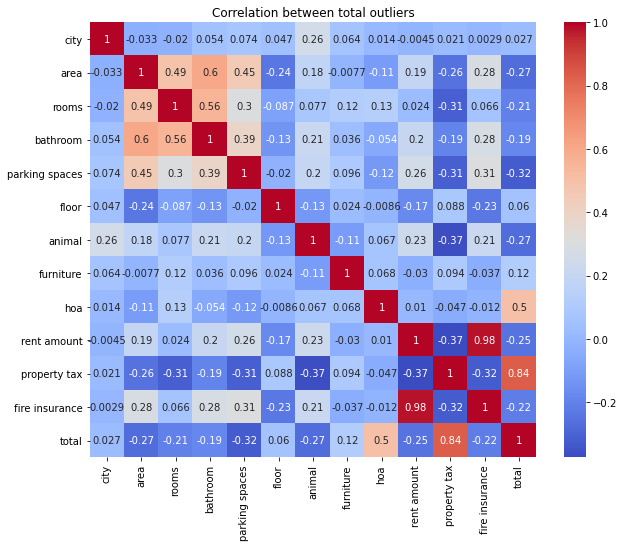

In [121]:
total_outliers = total_outliers.fillna(0)
corr = total_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between total outliers")
plt.show()

- we see that the value of total does not have a significant correlation with anyone other than the mentioned property tax, which suggests that the emissions have no basis
- next, consider the value of total without emissions and how it correlates with the rest

In [122]:
total_normal = df[df['total'] < 20000]
total_normal

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,1,1,0,8000,1000,121,9121
1,0,64,2,1,1,10,1,0,540,820,122,11,1493
2,1,443,5,5,4,3,1,1,4172,7000,1417,89,12680
3,1,73,2,2,1,12,1,0,700,1250,150,16,2116
4,1,19,1,1,0,0,0,0,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,1,0,420,1150,0,15,1585
6076,1,84,2,2,1,16,0,1,768,2900,63,37,3768
6077,0,48,1,1,0,13,1,0,250,950,42,13,1255
6078,1,160,3,2,2,0,0,0,0,3500,250,53,3803


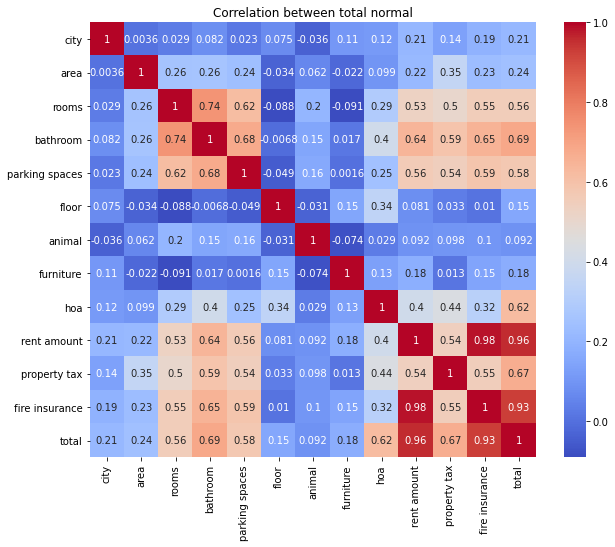

In [123]:
total_normal = total_normal.fillna(0)
corr = total_normal.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between total normal")
plt.show()

- we see that total (except for property tax, fire insurance, rent amount) correlates well with hoa, parking spaces, bathroom, room and interestingly not with area, so the amount does not depend much on the area of the house

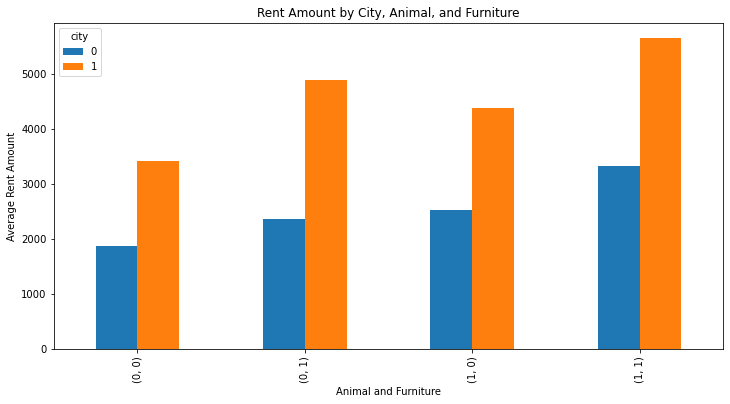

In [169]:
df_grouped = total_normal.groupby(['city', 'animal', 'furniture'])[['rent amount']].mean()

df_pivot = df_grouped.pivot_table(index=['animal', 'furniture'], columns='city', values='rent amount')

ax = df_pivot.plot(kind='bar', figsize=(12, 6))
ax.set_xlabel('Animal and Furniture')
ax.set_ylabel('Average Rent Amount')
ax.set_title('Rent Amount by City, Animal, and Furniture');

- according to the categorical features animal, furniture, city, we see those who have both animals and furniture pay more on average, regardless of the city, and on the contrary, those who do not have animals and furniture pay on average less than the rest, which tells us that their presence plays a significant role role in pricing
- It can be seen that on average, due to the presence of furniture, people pay about twice as much as Due to the presence of a pet